In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, delim_whitespace=True, names=column_names)


data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data.dropna(inplace=True)

<ipython-input-43-4cb0b7d02ddf>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names)


In [ ]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
y = data['mpg']


In [ ]:
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))  # Single output for regression
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3515  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0579 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0826 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8298 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6939 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7327 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5480 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4939 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2977 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4642 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2328 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2029 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9931 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9789 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [ ]:
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2463  
Mean Squared Error: 0.2494


In [ ]:
predictions = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


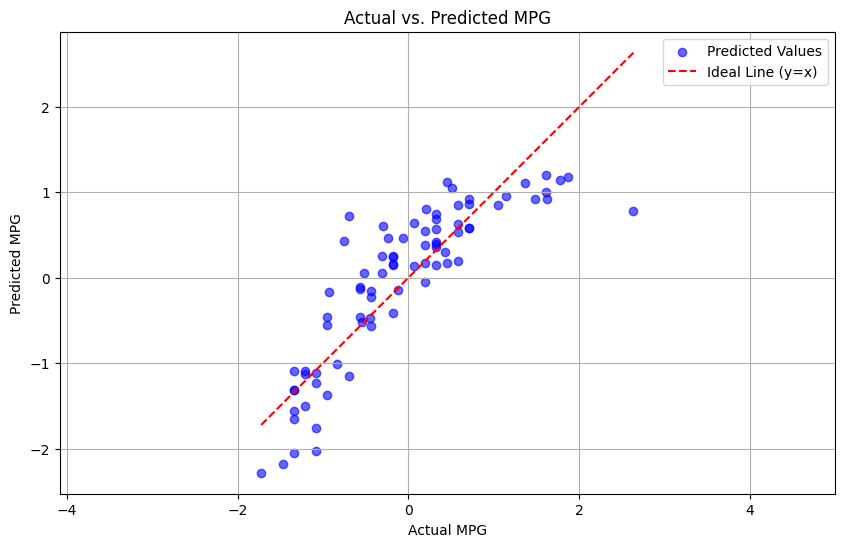

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted Values', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line (y=x)')
plt.title('Actual vs. Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()
